# Изучение работы TensorFlow2-Keras 



## 1. Загрузка tensorflow

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)


import distutils
if distutils.version.LooseVersion(tf.__version__) <= '2.0':
    raise Exception('This notebook is compatible with TensorFlow 1.14 or higher, for TensorFlow 1.13 or lower please use the previous version at https://github.com/tensorflow/tpu/blob/r1.13/tools/colab/fashion_mnist.ipynb')


Tensorflow version 2.3.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

!$^*$Примечение:

В Google Colab возможны варианты тренировки на CPU, GPU и TPU
 <a href="https://cloud.google.com/tpu/"><img valign="middle" src="https://raw.githubusercontent.com/GoogleCloudPlatform/tensorflow-without-a-phd/master/tensorflow-rl-pong/images/tpu-hexagon.png" width="50"></a>

Для среды выполнения кода выбирите в меню **среда выполнения** (**runtime**) пункт **Сменить среду выполнения** (**Change runtime type**)
Затем выбрите GPU или TPU.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/uc14.png" width="500">
<img src="https://course.fast.ai/images/colab/04.png" width="350">


## 2. задача классификации рукописных цифр MNIST
Загрузим один из готовых датасетов Fashion MNIST - с силуэтами одежды


In [ ]:
import sklearn
import sklearn.datasets 
import sklearn.model_selection 

(1797, 64)


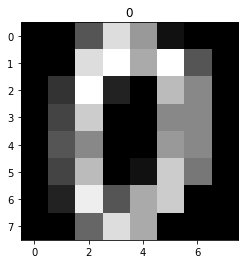

In [ ]:
digits = sklearn.datasets.load_digits()
print(digits.data.shape)

plt.figure()
plt.gray() 
plt.imshow(digits.images[0]) 
plt.title(digits.target[0])
plt.show() 

Загрузим данные

In [ ]:
# add empty color dimension
x = digits.images
print('number of images:',x.shape[0], 'image size:',x.shape[1:])


y = digits.target 
print('number of classe:',len(set(y)), 'number of targets', y.shape)

number of images: 1797 image size: (8, 8)
number of classe: 10 number of targets (1797,)


создадим два набора данных

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.33, random_state=42)

print('\n x_train shape = ',x_train.shape,'\n x_test shape = ', x_test.shape)



 x_train shape =  (1203, 8, 8) 
 x_test shape =  (594, 8, 8)


!$^*$ Примечение: Если вы выполняете ЛР с использованием GPU или TPU - возможно целисообразно загрузить более большой набор данных - рукописных цифр.

Для загрузки полонго набора MNIST можно использовать следующий код
```python
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

print('x_train shape = ',x_train.shape,'\n x_test shape = ', x_test.shape)
print('number of classes: ', len(set(y_train)))

```

!$^*$ Примечение 2: Отметим, что полный набор MNIST не только имеет больше изображений, но и каждое изображение имеет размер 28x28, тогда как в урезанном наборе каждое изображение имеет размер 8х8!

Добавим к изображениям 3-ю разменость - это необходимо,чтобы они были именно изображениями, то есть имели ширину, длину и число цветов (например, RGB).

In [ ]:
# add empty color dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

Проверим размер изображений и то, что у нас в трейне и в тесте есть изображения всех классов

x_train shape =  (1203, 8, 8, 1) 
 x_test shape =  (594, 8, 8, 1)
lables of classes:  [0 1 2 3 4 5 6 7 8 9]
lables of classes:  [0 1 2 3 4 5 6 7 8 9]


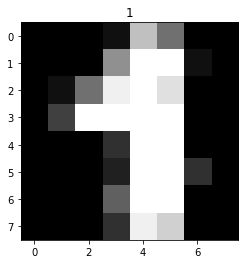

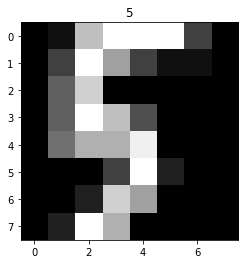

In [ ]:
print('x_train shape = ',x_train.shape,'\n x_test shape = ', x_test.shape)
print('lables of classes: ', (np.unique(y_train)))
print('lables of classes: ', (np.unique(y_test)))

plt.imshow(x_train[0][:,:,0]);plt.title(y_train[0]); plt.show()
plt.imshow(x_test[8][:,:,0]);plt.title(y_test[8]); plt.show()

## Сверточная сеть

**Создадаим модель - последовательную (```Sequential```) сверточную сеть типа Lenet**

![](https://paperswithcode.com/media/methods/LeNet_Original_Image_48T74Lc.jpg)

Однако добавим к  сети Lenet батч нормализацию и дроп-ауты.


In [ ]:
def create_model(x_data):

  # MODEL TYPE
  model = tf.keras.models.Sequential()

  #INPUT LAYER DOES NOT DESCRIBED
  

  #1-ST LAYER (CONVOLUTION LAYER)
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_data.shape[1:]))  
  model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))  
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Dropout(0.25))

  #2-ND LAYER (CONVOLUTION LAYER)
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_data.shape[1:]))
  model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))
  
  #3-RD LAYER (CONVOLUTION LAYER)
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_data.shape[1:]))
  model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Dropout(0.25))

  #4-TH LAYER (FLATTEN)
  model.add(tf.keras.layers.Flatten())

  #5-TH LAYER (FULLY CONNECTED)
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))  
  model.add(tf.keras.layers.Dropout(0.5))

  #6-TH LAYER - OUTPUT (FULLY CONNECTED)
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Activation('softmax'))

  return model

def __init__(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), groups=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)

Тепер создадим модель по описанной функции

In [ ]:
model = create_model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 8, 8, 1)           4         
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 8, 64)          1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 64)          256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 128)         204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0

Опишим особенности обучения модели:
1. Будем использовать Adam оптимизатор.
2. Функция потерь - котегориальная взаимная энтропия.
3. Также будем в ходе обучения следить за качеством оубчения - мертикой обучения. В качестве метрики выбирем точность классификации категорий (categorical_accurac)

!$^*$ Примечание описанная модель может быть запущена на GPU или на CPU при помощи данного кода. Для того, чтобы запустить модель на TPU можно использовать следующий код
```python
tf.keras.backend.clear_session()

resolver = tf.distribute.cluster_resolver.TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)

# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.experimental.TPUStrategy(resolver)

with strategy.scope():
  model = create_model()
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
      loss='sparse_categorical_crossentropy',
      metrics=['sparse_categorical_accuracy'])
```

По вопорсам работы с TPU в колаб также доступны следующие туториалы
https://cloud.google.com/tpu/docs/tutorials

In [ ]:
LR = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=LR, )

model.compile(
              optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

Проведем процесс обучения.

опишим число эпох, размер батча и спец. параметр - число шагов в эпохе (число минибатчей, которые нужно использовать в каждую эпоху)

In [ ]:
EPOCHS = 200
BATH_SIZE = 64
STEPS = len(x_train)//BATH_SIZE

Теперь добавим специальную функцию управления скоростью обучения - она нужна для того, чтобы как можно быстрее дойти до грубого приближения "хороших" значений весов на ранних стадиях обучения

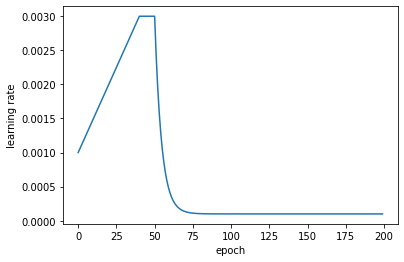

In [ ]:
start_lr = LR
min_lr   = LR/10
max_lr   = LR*3

rampup_epochs  = EPOCHS/5
sustain_epochs = 10
exp_decay      = .8

def lr_control(epoch):
  if epoch < rampup_epochs:
    return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
  
  elif epoch < rampup_epochs + sustain_epochs:
    return max_lr
  
  else:
    return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr
    
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch:lr_control(epoch), verbose=True)

rang = np.arange(EPOCHS)


y = [lr_control(x) for x in rang]

plt.plot(rang, y)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.show()

также создадим функцию ранней остановки, для нее зададим метрику, по которой должен идти контроль (```val_loss```) и число эпох в течение которых надо считать средний показатель для остановки

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor  = 'val_loss', 
                                              patience = 20)

Процесс обучения с сохранением истории

In [ ]:
history =\
  model.fit(
            x_train.astype(np.float32), 
            y_train.astype(np.float32),
            epochs = EPOCHS,
            steps_per_epoch=STEPS,
            validation_data=(x_test.astype(np.float32), 
                              y_test.astype(np.float32)),
            callbacks=[lr_callback,
                       early_stop]
           )


Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
Epoch 1/200
18/18 [==============================] - 4s 201ms/step - loss: 0.2372 - sparse_categorical_accuracy: 0.9751 - val_loss: 1.1952 - val_sparse_categorical_accuracy: 0.9579

Epoch 00002: LearningRateScheduler reducing learning rate to 0.00105.
Epoch 2/200
18/18 [==============================] - 4s 200ms/step - loss: 0.0702 - sparse_categorical_accuracy: 0.9900 - val_loss: 0.2999 - val_sparse_categorical_accuracy: 0.9848

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0011.
Epoch 3/200
18/18 [==============================] - 4s 203ms/step - loss: 0.0488 - sparse_categorical_accuracy: 0.9942 - val_loss: 0.2243 - val_sparse_categorical_accuracy: 0.9832

Epoch 00004: LearningRateScheduler reducing learning rate to 0.00115.
Epoch 4/200
18/18 [==============================] - 4s 202ms/step - loss: 0.0157 - sparse_categorical_accuracy: 0.9950 - val_loss: 0.1874 - val_sparse_categorical_accuracy: 0.

посмотрим на результат

In [ ]:
final_accuracy = history.history
# print(final_accuracy.keys())
print('average accuracy on validation:',np.mean(final_accuracy['val_sparse_categorical_accuracy']))

average accuracy on validation: 0.9896349135567161


визуализируем результат обучения

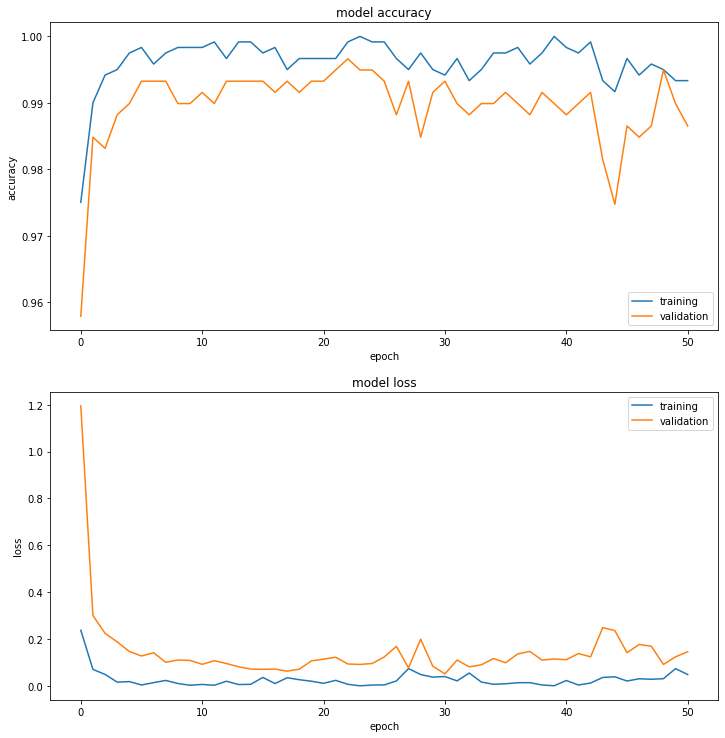

In [ ]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['sparse_categorical_accuracy'], history.history['val_sparse_categorical_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)


оценим точность на тестовом датасете

In [ ]:
# evaluate the model
scores = model.evaluate(x_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


19/19 [==============================] - 0s 10ms/step - loss: 0.3169 - sparse_categorical_accuracy: 0.9731

sparse_categorical_accuracy: 97.31%


сохраним веса

In [ ]:
model.save_weights('/content/mnist_weigths.h5', overwrite=True)

## Представление результатов обучения

Загрузим сохраненную модель

In [ ]:
cpu_model = create_model(x_test)
cpu_model.load_weights('/content/mnist_weigths.h5')



Проведем предсказания модели и посмотрим на несколько результатов

In [ ]:
predicted = np.argmax(cpu_model.predict(x_test), axis=-1)
                                        
print('predicted:',predicted[:12])
print('actual:',y_test[:12])


predicted: [6 9 3 7 2 2 5 2 5 2 1 9]
actual: [6 9 3 7 2 1 5 2 5 2 1 9]


Но так оценить где у нас проблемы будет сложно - по этому используем метод представления результатов в виде т.н. "теплокарты"

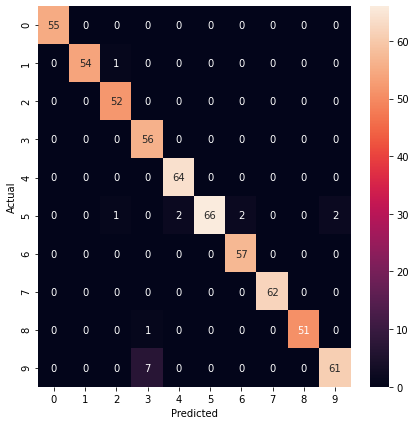

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_cm(y_test, y_pred):
    plt.rcParams.update({'font.size': 10})
    '''
    Графическое представление confusion matrix
    '''
    conf_mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(7,7))
    sns.heatmap(conf_mat, 
                annot=True, 
                fmt='d',
                xticklabels=np.unique(y_test), 
                yticklabels=np.unique(y_test))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
plot_cm(y_test, np.argmax(model.predict(x_test), axis=-1))

Тепереь посмотрим визуально, что получилось

<Figure size 576x576 with 0 Axes>

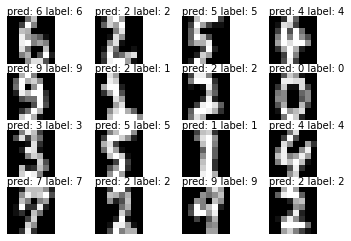

In [ ]:

LABEL_NAMES = np.arange(10)

def plot_predictions(images, predictions, lables):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))


  f, axes = plt.subplots(nc, 4)

  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')
    
    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    axes[x, y].text(-0.5, -0.7, 'pred: '+str(label)+' label: '+str(lables[i]))
  plt.show()
    

plt.gcf().set_size_inches(8, 8)  
plot_predictions(np.squeeze(x_test[:16]), cpu_model.predict(x_test[:16]), y_test[:16])



## Упражнения

<font size=3>
    
1. Исследовать модель, изменяя параметры и добавляя слои и их регуляризацию и инициализацию слоев, например дроп-ауту, батч-нормализацию или L2 регуляризацию



- - -
# 3. Исследование автоэнкодера в Keras 
- - - 

## 3.1 Принцип работы Автоэнкодреа

<font size =3 face ='Calibri' >

Авто-энкодер это специальный вид сетей для обучения без учителя, при этом главная цель таких сетей - это научится повторять вход на выход нетривиально, то есть так, чтобы скрытый слой не повторял входной. 

Авто-энкодеры получили широкое распространения для предобучения сетей, а также для таких целей, как, например, фильртация шума или сжатие данных (скрытм слоем, потом разкодировка в выходной слой)

![autoencoder.jpg](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1522830223/AutoEncoder_kfqad1.png)

теперь рассмотрим пример. 

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
import matplotlib.pyplot as plt


Tensorflow version 2.3.0


возьмем  датасет FASHION-MNIST - состоящий из 60 тыс. изображений предметов одежды 

x_train shape =  (60000, 28, 28) 
 x_test shape =  (10000, 28, 28)
number of classes:  10
(60000, 28, 28) (10000, 28, 28)


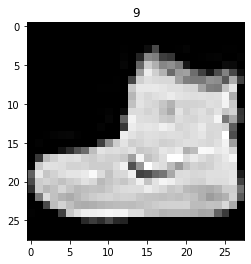

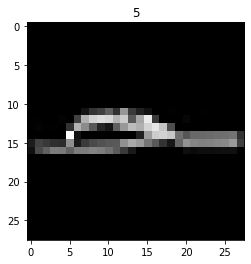

In [ ]:
# Loads the training and test data sets (ignoring class labels)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
 
print('x_train shape = ',x_train.shape,'\n x_test shape = ', x_test.shape)
print('number of classes: ', len(set(y_train)))


# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())

x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value

print(x_train.shape, x_test.shape)

plt.imshow(x_train[0][:,:]);plt.title(y_train[0]); plt.show()
plt.imshow(x_test[8][:,:]);plt.title(y_test[8]); plt.show()

в данном случае будем использовать полносвязную сеть. Поэтмоу представим изображения в виде одномерных векторов

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

(x_train.shape, x_test.shape)

((60000, 784), (10000, 784))

тепер создадим наиболее простой автоэнкодер с одним скрытам слоем

In [ ]:
def vanila_AE(X, encoding_dim=32):
    
    input_dim = X.shape[1] # input dimension = 784   

    autoencoder = tf.keras.models.Sequential()
    autoencoder.add(tf.keras.layers.Dense(encoding_dim, 
                                          input_shape=(input_dim,), 
                                          activation='relu'))
    
    autoencoder.add(tf.keras.layers.Dense(input_dim, 
                                          input_shape=(encoding_dim,),
                                          activation='sigmoid'))
    
    compression_factor = float(input_dim) / encoding_dim
    return autoencoder,  compression_factor
    


создадим модель

In [ ]:
autoencoder, cf = vanila_AE(x_train, encoding_dim=32)
print("Compression factor: %s" % cf)
autoencoder.summary()


Compression factor: 24.5
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_47 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


<font size = 4>
теперь у нас автоэенкодер как на картинке ниже

![Vanila-Auto_encoder.png](https://www.researchgate.net/profile/Guillaume-Alexandre_Bilodeau/publication/327434418/figure/fig2/AS:667345727025158@1536119028351/Diagram-showing-a-Vanilla-Autoencoder.png)

## 3.2 Обучение авоэнкодера

In [ ]:
LR=1e-3
EPOCHS = 50
BATCH = 100

In [ ]:
autoencoder,_ = vanila_AE(x_train, encoding_dim=32)

autoencoder.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(lr=LR))


autoencoder.fit(x_train, 
                x_train,
                epochs      = EPOCHS,
                batch_size  = BATCH,
                shuffle     = True,
                verbose     = True,
                validation_data = (x_test, x_test))

Epoch 1/50
600/600 [==============================] - 3s 5ms/step - loss: 0.3637 - val_loss: 0.3165
Epoch 2/50
600/600 [==============================] - 3s 5ms/step - loss: 0.3047 - val_loss: 0.2994
Epoch 3/50
600/600 [==============================] - 3s 5ms/step - loss: 0.2932 - val_loss: 0.2920
Epoch 4/50
600/600 [==============================] - 3s 5ms/step - loss: 0.2883 - val_loss: 0.2891
Epoch 5/50
600/600 [==============================] - 3s 5ms/step - loss: 0.2861 - val_loss: 0.2875
Epoch 6/50
600/600 [==============================] - 3s 5ms/step - loss: 0.2850 - val_loss: 0.2866
Epoch 7/50
600/600 [==============================] - 3s 5ms/step - loss: 0.2842 - val_loss: 0.2860
Epoch 8/50
600/600 [==============================] - 3s 5ms/step - loss: 0.2838 - val_loss: 0.2858
Epoch 9/50
600/600 [==============================] - 3s 5ms/step - loss: 0.2834 - val_loss: 0.2855
Epoch 10/50
600/600 [==============================] - 3s 5ms/step - loss: 0.2832 - val_loss: 0.2852

Посмотрим на результат обучения


(10000, 784)


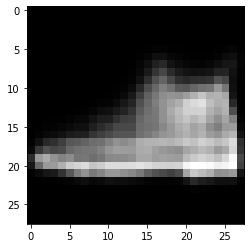

In [ ]:
decoded_imgs = autoencoder.predict(x_test)
print(decoded_imgs.shape)

plt.imshow(decoded_imgs[0].reshape(28,28))
plt.show()

<font size =3>

Для того, чтобы посмотреть, что делается внутри сети - выделим отдельно энкодер и посмотрим на его результат - т.н. латентное пространство

In [ ]:
def get_encoder(X, autoencoder ):
    
    input_dim = X.shape[1] # input dimension = 784  
    
    input_img = tf.keras.layers.Input(shape=(input_dim,))

    encoder_layer = autoencoder.layers[0]

    encoder = tf.keras.models.Model(input_img, encoder_layer(input_img))

    return encoder

In [ ]:
encoder = get_encoder(x_train, autoencoder )
print(encoder.summary())

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_44 (Dense)             (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None


<font size =4>

кодер имеет структуру как на картинке
![encoder-RBM](https://www.researchgate.net/profile/Andee_Kaplan/publication/328894173/figure/fig2/AS:725546539433985@1549995183104/An-example-restricted-Boltzmann-machine-RBM-consisting-of-two-layers-one-hidden.png)

<font size = 4 face = 'Arial' >
    
**тест результатов на случайных изображениях**

Возьмем 10 случайных изображений

In [ ]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

визуализация результатов

**посмотрим на наши 10 случайных изображений, их скрытые пространства и результаты их автокодирования**

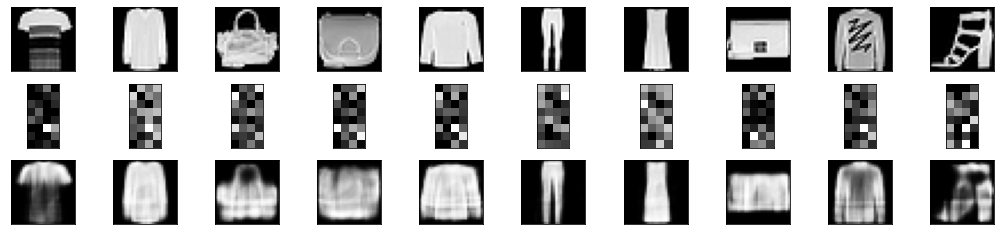

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 3.3 Упражнения

<font size=4  face = 'Calibri' style='Line-height : 1.5em'>  
    
**1.** преорбазовать модель в  <font size = 5> **deep autoencoder** </font> (добавить слои регуляризацию и тп), посмотреть как это скажится на результатах

In [ ]:
#

<font size=4  face = 'Calibri' style='Line-height : 1.5em'>  
    
**2.** создать сверточный автоэнкодер  (<font size = 5> **convolution autoencoder** </font> ) (заменить полносвязные слои на сверточные) и посмотреть как это скажется на результате

In [ ]:
#

<font size =4 face = 'Calibry' style='Line-height:1.5em'>

    
**для создания развертывающего слоя в противовес max_pooling можно использовать следующую процедуру** 

**Upsampling 2D layer**

```python 
    keras.layers.UpSampling2D(
                    pool_size, 
                    interpolation)
```

<font size=4 face = 'Calibri' style='Line-height : 1.5em'>  

**3.** Cоздать фильтрующий автоэнкодер <font size =5 >**de-noise autoencoder** </font> (при этом надо добавить доп. слой добавления шумов в модель,
 скрытый слой дложен быть шире входного) и исследовать свойства такой модели


In [ ]:
#

- - -
# 4. Генеративно-состязательные сети (Generative Adversarial Network, GAN)
- - -


 Генеративно-состязательные сети (Generative Adversarial Network, GAN)
## 4.1 Основы работы GAN

<font size=4  face = 'Calibri' style='Line-height : 1.5em'>  

GAN - генеративно-состязательная сеть - это специальный вид сетей, для генерации данных из шума (напр. белого или равномерного):

1. Основная цель сети при обучении- подобрать веса так, чтобы шум приобрел форму заданных данных, то есть создать соответствующий данным фильтр.  

    
2. сеть использует 2 под-сети: дискриминатор и генератор, цель первой - научится классифицировать где реальные данные, а где шум, цель второй - научится обманывать дикриминатор. 

 

<font size=4 face='Calibri' color = black|brown>
принцип работы показан ниже

![GAN-basic](https://camo.githubusercontent.com/912e1ea2c0ed056db1fd96cf45752decb74e6844/68747470733a2f2f646f63732e676f6f676c652e636f6d2f75633f69643d30427934517678416b41694e4363476c345645524d4f55644e543055)

<font size=4 face='Calibri' color = black style='Line-height:1.5em'>

см. также следующие исследования [это](https://github.com/T-Almeida/GAN-study/blob/master/01-%20GAN-2014-IanGoodfellow%20(GAN)%20-%20Keras%20implementation.ipynb) (и в дополнение 
[тут](https://github.com/erschmidt/Jupyter-GAN), 
[тут](https://github.com/tjwei/GANotebooks), 
[тут](https://github.com/T-Almeida/GAN-study),
[тут](https://github.com/eriklindernoren/Keras-GAN)
и широкое исследование
[тут](https://github.com/wiseodd/generative-models ))

<font size=4 face='Calibri' color = black style='Line-height:1.5em'>
    
импорт

In [ ]:
from numpy.random import seed
seed(42)

import numpy as np

##imports
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import os
import functools

<font size=4 face='Calibri' color = black style='Line-height:1.5em'>
    
набор данных - будем использовать также набор данных MNIST


In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
IMAGE_SIZE     = x_train.shape[1:]
IMAGE_1D_SIZE  = functools.reduce(lambda a,b:a*b,  x_train.shape[1:])

print(IMAGE_SIZE)
print(IMAGE_1D_SIZE)

(28, 28)
784


In [ ]:
x_train = x_train.reshape([-1,IMAGE_1D_SIZE]).astype('float32')
x_test  = x_test.reshape([-1,IMAGE_1D_SIZE]).astype('float32')

In [ ]:
#rescale the image to [0-1] range
x_train = x_train/ 255
x_test  = x_test/ 255

print("Shape of the training images",x_train.shape)

Shape of the training images (60000, 784)


<font size=4 face='Calibri' color = black style='Line-height:1.5em'>
    
визуализация

In [ ]:
def plot_mnist_images(data, img_shape = IMAGE_SIZE):
    
    imgs = data.reshape(-1,img_shape[0],img_shape[1])   
    
    edge_of_imgs = int(np.sqrt(data.shape[0]))
    
    n_of_imgs = (edge_of_imgs)**2

    fig = plt.figure(figsize=(4, 4)) # create fugure 

    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    plt.cla()
    
    for i in range(n_of_imgs):

        ax = fig.add_subplot(edge_of_imgs, edge_of_imgs, i + 1, xticks=[], yticks=[])

        ax.imshow(imgs[i,:], cmap='binary')
    
    # Show the plot
    plt.show()

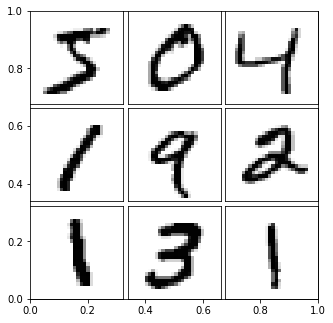

In [ ]:
plot_mnist_images(x_train[:9], (28,28))

## 4.2 Создание ГАН (генератора и дискреминатора) 

<font size=5 face='Calibri' style='Line-height:1.5em'>
будем использовать шум размерности 100

In [ ]:
#Dimention of random vector using for sampling
Z_SHAPE = 100

**генератор**

In [ ]:
#unput layer
g_input = tf.keras.layers.Input(shape=[Z_SHAPE], name="g_input")

#hidden layer
H = tf.keras.layers.Dense(128)(g_input)
H = tf.keras.layers.Activation('relu')(H)

#output layer
g_output = tf.keras.layers.Dense(IMAGE_1D_SIZE)(H)
g_output = tf.keras.layers.Activation('sigmoid')(g_output)

#compil midel
generator = tf.keras.models.Model(g_input,g_output, name="generator")

# see what obtained
generator.summary()


Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
g_input (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               12928     
_________________________________________________________________
activation_22 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 784)               101136    
_________________________________________________________________
activation_23 (Activation)   (None, 784)               0         
Total params: 114,064
Trainable params: 114,064
Non-trainable params: 0
_________________________________________________________________


<font size=4  face = 'Calibri' style='Line-height : 1.5em'>    
**дискриминатор - классифицирующая сеть**

In [ ]:
LR = 9e-4


#input layer
d_input = tf.keras.layers.Input(shape=[IMAGE_1D_SIZE],  name="d_input")

#hidden layer
H = tf.keras.layers.Dense(128)(d_input)
H = tf.keras.layers.Activation('relu')(H)

#output layer
d_output = tf.keras.layers.Dense(1)(H)
d_output = tf.keras.layers.Activation('sigmoid')(d_output)

# create model
discriminator = tf.keras.models.Model(d_input,d_output, name="discriminator")

#compil midel
d_optimizer = tf.keras.optimizers.Adam(lr=LR)
discriminator.compile(loss='binary_crossentropy', optimizer=d_optimizer)

# see what obtained
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d_input (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_24 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 129       
_________________________________________________________________
activation_25 (Activation)   (None, 1)                 0         
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


<font size=4  face = 'Calibri' style='Line-height : 1.5em'> 

функция, чтобы сделать слои нетренируемыми 




<font size=4  face = 'Calibri' style='Line-height : 1.5em'> 

**NOTE**
мы будем использовать дискриминатор с фиксированными параметрами при обучении генератора

<font size=4  face = 'Calibri' style='Line-height : 1.3em' color=red> 

**В силу некоторых технических недочетов keras имено тут надо замораживать слои**

In [ ]:
def make_trainable(net, val=True):
    net.trainable = val
    for l in net.layers:
        l.trainable = val

# Freeze weights in the discriminator for adversarial training
make_trainable(discriminator, False)


<font size=6  face = 'Calibri' style='Line-height : 1.5em'> 
**ГАН - Генеративно состязательная сеть**

In [ ]:
LR = 9e-4

# Build stacked GAN model to train the generator
gan_input = tf.keras.layers.Input(shape=[Z_SHAPE], name="gan_z_input")
gan_fake_samples = generator(gan_input)
gan_output = discriminator(gan_fake_samples)

#create model 
gan = tf.keras.models.Model(gan_input, gan_output, name="generator_adversarial")

#compile model 
gan_optimizer = tf.keras.optimizers.Adam(lr=LR)
gan.compile(loss='binary_crossentropy', optimizer=gan_optimizer)

# see the model
gan.summary()

Model: "generator_adversarial"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gan_z_input (InputLayer)     [(None, 100)]             0         
_________________________________________________________________
generator (Functional)       (None, 784)               114064    
_________________________________________________________________
discriminator (Functional)   (None, 1)                 100609    
Total params: 214,673
Trainable params: 114,064
Non-trainable params: 100,609
_________________________________________________________________


## 4.3 Тренировка GAN

<font size=4  face = 'Calibri' style='Line-height : 1.5em'>  
    
 процедура тренировки состоит из 2 
 этапов
 </font>
 
 
1 этап - генерация изображений генератором 
и присвоение им класса 0 и выборка реальных изображений с классом 1 и обучение дискриминатора на сформированном наборе данных.


2 этап - обучение генератора с фиксированным дискриминатором генерировать данные из шума.



<font size =5 face = 'Calibri' >    
    
функция, для создания шума на входе генератора

In [ ]:
def random_Z(m, n=Z_SHAPE):
    return np.random.uniform(-1., 1., size=[m, n])    

<font size =5 face = 'Calibri' >
    
вспомогательные процедуры

In [ ]:
#save losses 
losses = {}
losses["gan_loss"] = []
losses["d_loss"]   = []

<font size =5 face = 'Calibri' >
    
    
**тренеровка** 

Epoch:  0
Discriminator loss:  0.6748327016830444
Generator loss: 2.5252654552459717


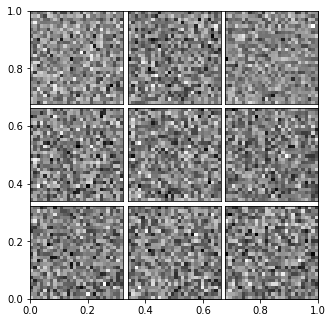

Epoch:  1500
Discriminator loss:  0.02027037739753723
Generator loss: 4.883783340454102


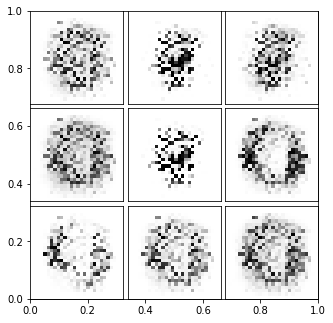

Epoch:  3000
Discriminator loss:  0.052065931260585785
Generator loss: 5.4890007972717285


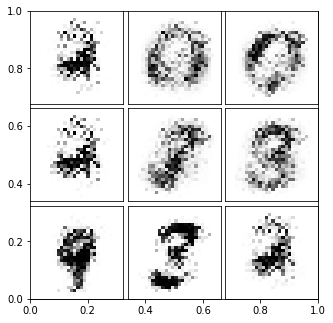

Epoch:  4500
Discriminator loss:  0.10429717600345612
Generator loss: 4.177538871765137


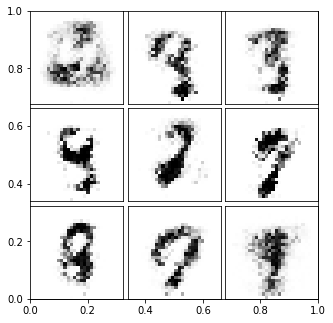

Epoch:  6000
Discriminator loss:  0.0875246673822403
Generator loss: 4.758760452270508


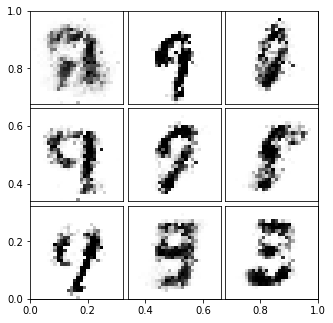

Epoch:  7500
Discriminator loss:  0.244710773229599
Generator loss: 2.768871784210205


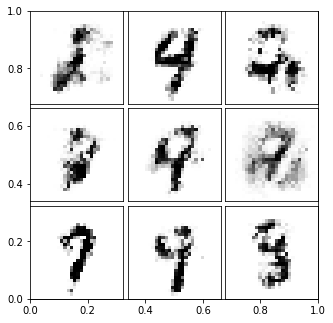

Epoch:  9000
Discriminator loss:  0.23804232478141785
Generator loss: 2.9235591888427734


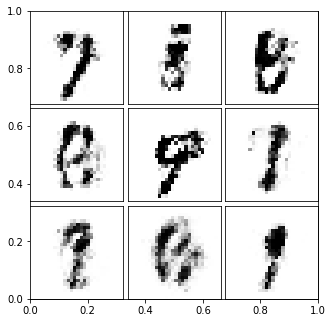

Epoch:  10500
Discriminator loss:  0.3897249698638916
Generator loss: 2.854733943939209


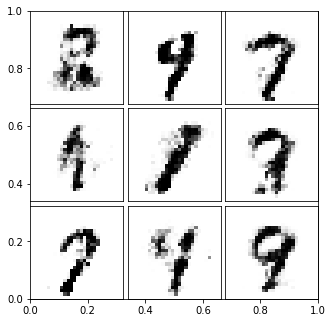

Epoch:  12000
Discriminator loss:  0.3873051702976227
Generator loss: 2.3427109718322754


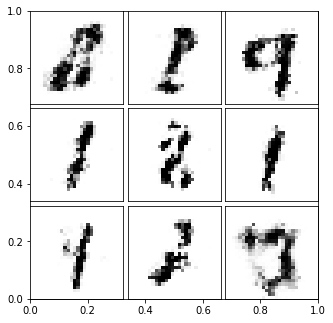

Epoch:  13500
Discriminator loss:  0.3473866283893585
Generator loss: 2.3499131202697754


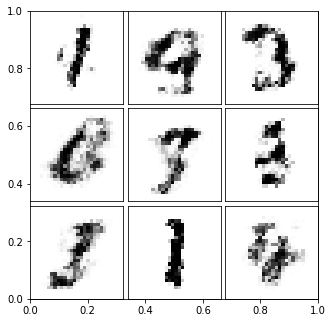

Epoch:  15000
Discriminator loss:  0.3835495114326477
Generator loss: 2.304947853088379


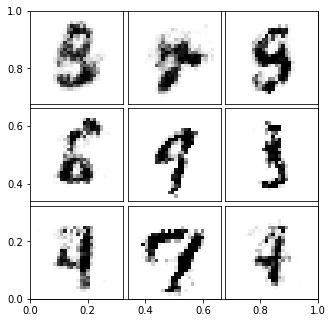

Epoch:  16500
Discriminator loss:  0.5645188093185425
Generator loss: 1.8531239032745361


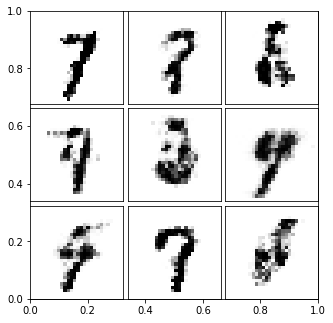

Epoch:  18000
Discriminator loss:  0.42430609464645386
Generator loss: 1.6774439811706543


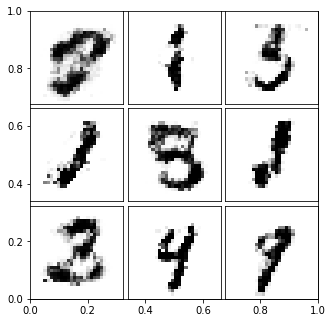

Epoch:  19500
Discriminator loss:  0.44557684659957886
Generator loss: 1.7806299924850464


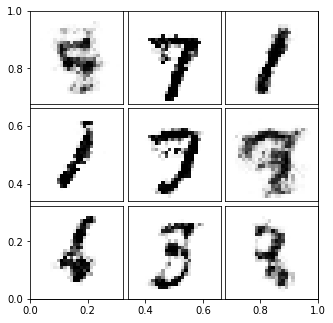

Epoch:  21000
Discriminator loss:  0.33287954330444336
Generator loss: 2.085783004760742


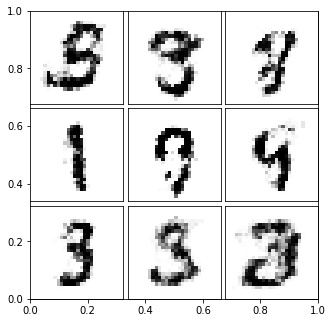

Epoch:  22500
Discriminator loss:  0.37482380867004395
Generator loss: 1.8962371349334717


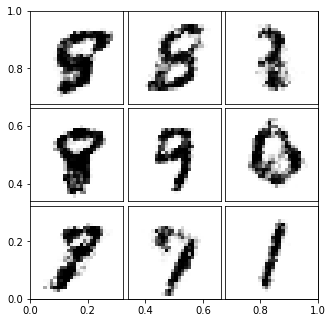

Epoch:  24000
Discriminator loss:  0.38339662551879883
Generator loss: 1.8427135944366455


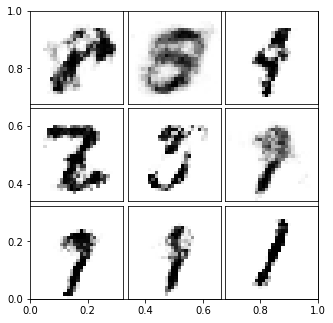

Epoch:  25500
Discriminator loss:  0.4600101411342621
Generator loss: 1.828047513961792


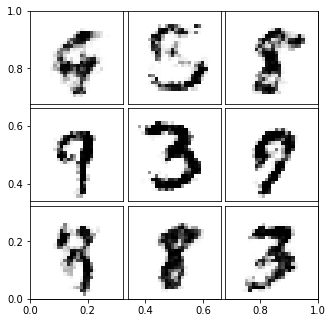

Epoch:  27000
Discriminator loss:  0.4194336533546448
Generator loss: 1.7807140350341797


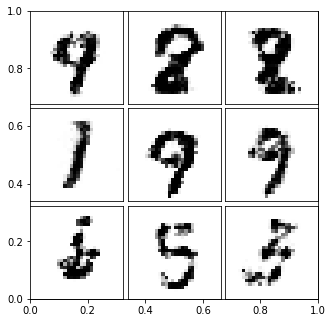

Epoch:  28500
Discriminator loss:  0.42180687189102173
Generator loss: 1.8579199314117432


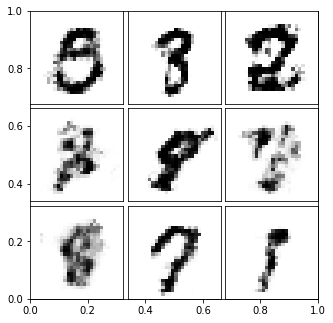

In [ ]:
batch_size = 64 #must be multiple of 2
epochs     = 30000


#save losses 
losses = {}
losses["gan_loss"] = []
losses["d_loss"]   = []

for i in range(epochs):
    
    #generate images
    synthetic_images = generator.predict_on_batch(random_Z(batch_size))
    
    #select from tranning set
    real_images = x_train[np.random.randint(0,x_train.shape[0],size=batch_size),:]
    
    d_x = np.concatenate((synthetic_images, real_images))
    d_y = np.zeros([2*batch_size,1])
    
    d_y[batch_size:] = 1 #second half of the batch are true images so have label 1 and fake (first half) have label 0
        
    #first discriminator
    make_trainable(discriminator,True)
    d_loss = discriminator.train_on_batch(d_x,d_y)
    
    #second generator in adversarail faction
    gan_x = random_Z(2*batch_size)
    gan_y = np.ones([2*batch_size,1])

    make_trainable(discriminator,False)
    gan_loss = gan.train_on_batch(gan_x,gan_y)
    
    losses["gan_loss"] += [gan_loss]
    losses["d_loss"]   += [d_loss]

    
    if i%(epochs/20) == 0:
        print("Epoch: ",i)
        print("Discriminator loss: ",d_loss)
        print("Generator loss:",gan_loss)
        
        #sample 9 images from generator
        generated_images = generator.predict_on_batch(random_Z(9))
        plot_mnist_images(generated_images)


<font size =5 face = 'Calibri' >
    
сохранение модели


In [ ]:
#Save models
gan.save('gan.hdf5')
discriminator.save('discriminator.h5py')

INFO:tensorflow:Assets written to: discriminator.h5py/assets


<font size =5 face = 'Calibri' >
    
Кривая обучения

Discriminator loss:  0.41276663541793823
Generator loss: 2.1325385570526123

 Plot learning curves 



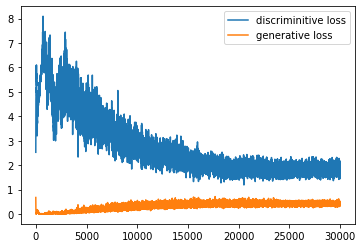

In [ ]:
print("Discriminator loss: ",d_loss)
print("Generator loss:",gan_loss)

print("\n Plot learning curves \n")

plt.plot(losses["gan_loss"], label='discriminitive loss')
plt.plot(losses["d_loss"], label='generative loss')
plt.legend()
plt.show()

<font size =5 face = 'Calibri' >

**резуьлтат обучения**

создадим 9 изображений из шума (`random_Z(9)`)

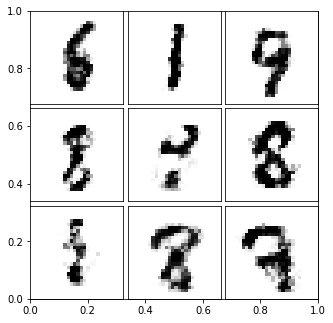

In [ ]:
generated_images = generator.predict_on_batch(random_Z(9))
plot_mnist_images(generated_images)

## 4.4 Упражнения

<font size =4 face = 'Calibri' >
    
**1.**  исследовать ГАН в зависимости от параметров модели и числа слоев

In [ ]:
#


</font> <font size =4 face = 'Calibri' style='Line-heght:1.5em'>
    
**2.** преорбазовать модель в сверточный ГАН

In [ ]:
#